<a href="https://colab.research.google.com/github/rccrdmr/MAT422-Mathematics-for-DataScience/blob/main/3.4_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.4 Logistic Regression

Logistic Regression is a binary classification model that uses a logistic function to predict the probability of a binary outcome (0 or 1). This approach can be extended to multiple classes and is widely used in tasks like image classification and text categorization.

### Problem Setup

Given input data in the form $\{(\alpha_i, b_i) : i = 1, \ldots, n\}$:
- **Features**: $\alpha_i \in \mathbb{R}^d$
- **Labels**: $b_i \in \{0,1\}$

We represent these as:
- Matrix $A \in \mathbb{R}^{n \times d}$ with rows $\alpha_j^T$, and
- Vector $b = (b_1, \ldots, b_n)^T \in \{0,1\}^n$

The goal is to find a function that approximates the probability of $b_i = 1$ as a function of $\alpha_i$.

### Model

The logistic regression model represents the **log-odds** of class 1 as a linear function of the features:

$$
\log \frac{p(\alpha; x)}{1 - p(\alpha; x)} = \alpha^T x
$$

Rearranging, we get the **probability function**:

$$
p(\alpha; x) = \sigma(\alpha^T x)
$$

where the **sigmoid function** $\sigma(t)$ maps values to a range between 0 and 1:

$$
\sigma(t) = \frac{1}{1 + e^{-t}}
$$

### Loss Function: Cross-Entropy

To optimize the model, we use **cross-entropy loss**. This measures how well the predicted probabilities align with the true labels:

$$
\ell(x; A, b) = -\frac{1}{n} \sum_{i=1}^n \left(b_i \log(\sigma(\alpha_i^T x)) + (1 - b_i) \log(1 - \sigma(\alpha_i^T x))\right)
$$

### Gradient Calculation

To minimize the loss function, we calculate its **gradient**:

$$
\nabla_x \ell(x; A, b) = -\frac{1}{n} \sum_{i=1}^n (b_i - \sigma(\alpha_i^T x)) \alpha_i
$$

### Gradient Descent Update Rule

Using **gradient descent**, we iteratively update $x$ in the direction of the negative gradient. Let $\beta$ be the learning rate:

$$
x_{k+1} = x_k + \beta \left(b_i - \sigma(\alpha_i^T x)\right) \alpha_i
$$

In **stochastic gradient descent** (SGD), we select a random sample $I$ to update as follows:

$$
x_{k+1} = x_k + \beta (b_I - \sigma(\alpha_I^T x_k)) \alpha_I
$$

### Summary

1. **Model**: Logistic regression models probabilities with a sigmoid function.
2. **Optimization**: We minimize cross-entropy loss.
3. **Gradient Descent**: Update parameters using the gradient to minimize the loss iteratively.

This structured approach provides a clear view of logistic regression, its components, and its optimization process.


## Logistic Regression Example: Predicting Insurance Subscription

This example demonstrates the core concepts of logistic regression:
- Logit Function
- Sigmoid Function
- Cross-Entropy Loss
- Gradient Descent
- Scikit-Learn Logistic Regression Demo

We'll use a dataset where the goal is to predict whether a customer will subscribe to an insurance service based on their age.

### Step 1: Logit Function

The logit function transforms probabilities into a linear combination of features. This is useful for logistic regression, as it allows us to model the relationship between features and the probability of an event.

The logit function is defined as:

$$\text{logit}(p) = \log \left( \frac{p}{1-p} \right) = \alpha^T x$$

where:
- $p$ is the probability
- $\alpha$ is the vector of parameters
- $x$ is the vector of features

The regression model is defined as:

$$\hat{p} = \sigma(\alpha^T x)$$

where:
- $\hat{p}$ is the predicted probability
- $\sigma$ is the sigmoid function

In [10]:
import numpy as np

def logit(p):
    """Logit Function"""
    return np.log(p / (1 - p))

# Initial probabilities
probabilities = np.array([0.2, 0.5, 0.7, 0.9])
logit_values = logit(probabilities)
print("Logit values:", logit_values)


Logit values: [-1.38629436  0.          0.84729786  2.19722458]


### Step 2: Sigmoid Function


The sigmoid function maps values from the real line to a range between 0 and 1, transforming linear combinations into probabilities.

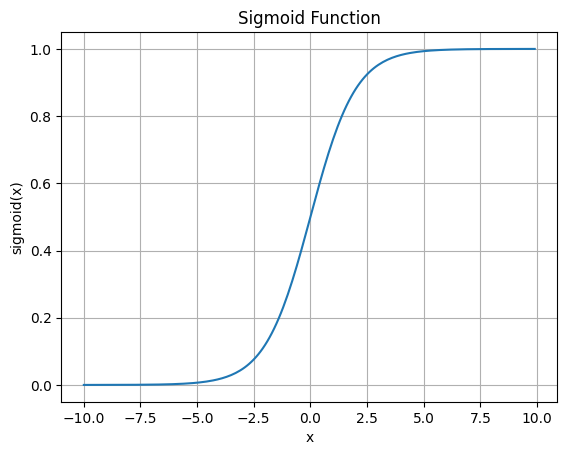

In [11]:
import matplotlib.pyplot as plt

def sigmoid(x):
    """Sigmoid Function"""
    return 1 / (1 + np.exp(-x))

X = np.arange(-10, 10, 0.1)
Y = sigmoid(X)
plt.figure()
plt.plot(X, Y)
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid()
plt.show()


### Step 3: Cross-Entropy Loss


Cross-entropy loss measures the difference between predicted probabilities and true labels. Let's define the cross-entropy loss function and compute it for example predictions and true labels.

In [14]:
def cross_entropy_loss(y, p):
    """Cross-Entropy Loss"""
    return -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))

# Example true labels and predictions
y = np.array([0, 1, 1, 0])
p = np.array([0.1, 0.9, 0.8, 0.4])
cel_y_p = cross_entropy_loss(y, p)
print("Cross-Entropy Loss:", cel_y_p)


Cross-Entropy Loss: 0.23617255159896325


### Step 4: Gradient Descent

Gradient descent minimizes the loss function by iteratively updating model parameters (weights and bias). Here’s a simple implementation for logistic regression.


In [18]:
# Initialize weights and bias
w = 0.1
b = 0
learning_rate = 0.01
iterations = 100

# Load data from CSV
import pandas as pd
data = pd.read_csv("insurance_data.csv")
X_train = data.age.to_numpy()
y_train = data.bought_insurance.to_numpy()

# Gradient Descent Loop
for i in range(iterations):
    linear_model = w * X_train + b
    predictions = sigmoid(linear_model)

    # Calculate gradients
    dw = np.dot(X_train, (predictions - y_train)) / len(X_train)
    db = np.sum(predictions - y_train) / len(X_train)

    # Update weights and bias
    w -= learning_rate * dw
    b -= learning_rate * db

    if i % 10 == 0:
        loss = cross_entropy_loss(y_train, predictions)
        print(f"Iteration {i}: w = {w:.4f}, b = {b:.4f}, loss = {loss:.4f}")


Iteration 0: w = -0.0237, b = -0.0044, loss = 1.3912
Iteration 10: w = 0.1311, b = -0.0147, loss = 0.9256
Iteration 20: w = -0.0351, b = -0.0324, loss = 0.7643
Iteration 30: w = 0.1588, b = -0.0420, loss = 1.1810
Iteration 40: w = 0.0122, b = -0.0598, loss = 1.9083
Iteration 50: w = -0.0194, b = -0.0745, loss = 1.4213
Iteration 60: w = 0.0444, b = -0.0869, loss = 0.6520
Iteration 70: w = -0.0323, b = -0.1025, loss = 1.1641
Iteration 80: w = 0.1455, b = -0.1121, loss = 1.0014
Iteration 90: w = -0.0001, b = -0.1291, loss = 1.6912


### Step 5: Logistic Regression with Scikit-Learn



Now, let's load the dataset and use Scikit-Learn's `LogisticRegression` to fit a logistic model for the insurance subscription prediction. Then, we'll visualize the model's predictions.

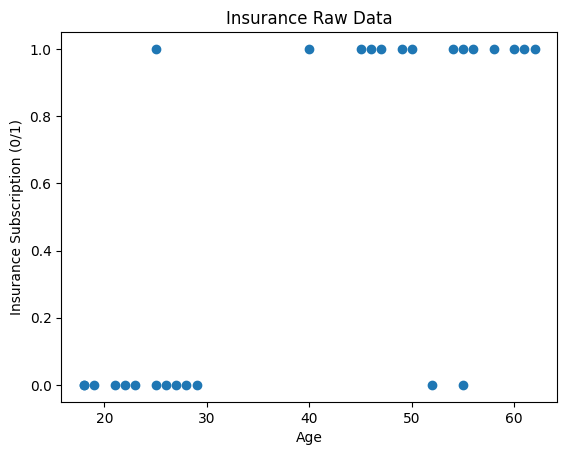

Model Coefficients: [[0.13546543]]
Model Intercept: [-5.26279121]


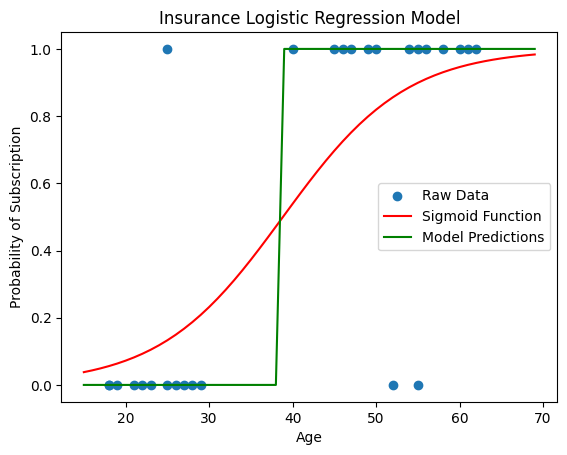

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Load data
data = pd.read_csv("insurance_data.csv")
X_train = data[['age']]
y_train = data['bought_insurance']

# Raw data
plt.figure()
plt.scatter(X_train, y_train)
plt.title("Insurance Raw Data")
plt.xlabel("Age")
plt.ylabel("Insurance Subscription (0/1)")
plt.show()

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

X_test = pd.DataFrame(np.arange(15, 70), columns=['age'])

# Calculate probabilities and predictions
model_probs = model.predict_proba(X_test)[:, 1]
model_preds = model.predict(X_test)

# Model Predictions
plt.figure()
plt.scatter(X_train, y_train, label="Raw Data")
plt.plot(X_test['age'], model_probs, color="r", label="Sigmoid Function")
plt.plot(X_test['age'], model_preds, color="g", label="Model Predictions")
plt.title("Insurance Logistic Regression Model")
plt.xlabel("Age")
plt.ylabel("Probability of Subscription")
plt.legend()
plt.show()
